In [1]:
# EDA : Ecploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
match = pd.read_csv('matches.csv')

In [4]:
delivery = pd.read_csv('deliveries.csv')

In [5]:
# Delivery

In [6]:
match.shape

(636, 18)

In [7]:
delivery.shape  # To get the shape i.e. no. of rows and columns of the data...

(150460, 21)

In [8]:
match.head()   # It will give the first 5 rows of the data as the output...

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
# Number of matches in IPL from 2008 to 2017...
match.shape[0]

636

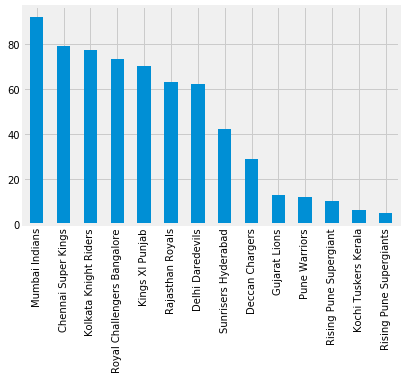

In [11]:
match['winner'].value_counts().plot(kind = 'bar')  # To plot no. of wins by every team in IPL history...

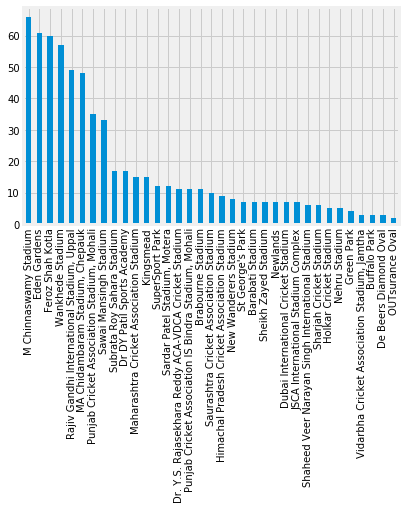

In [12]:
match['venue'].value_counts().plot(kind = 'bar')  # To plot no. of matches played at each venue in the IPL...

In [13]:
match['toss_winner'].value_counts()   # To count no. of toss won by each team in the IPL...

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [14]:
# To find out which team has played the most no. of games in the IPL history...
(match['team1'].value_counts() + match['team2'].value_counts()).sort_values().tail(1)

Mumbai Indians    157
dtype: int64

In [64]:
# To find out the top 5 run scorers in the IPL history...
(delivery.groupby('batsman').sum()['batsman_runs']).sort_values(ascending = False).head(5)

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

In [16]:
# To find out the total no. of sixes scored in the IPL history...
delivery[delivery['batsman_runs'] == 6].shape

(6523, 21)

In [17]:
# To find out the top 5 players who have scored most no. of 3's in IPL history...
new = delivery[delivery['batsman_runs'] == 3]
new.groupby('batsman').count()['batsman_runs'].sort_values(ascending = False).head()

batsman
M Vijay      17
S Dhawan     16
G Gambhir    15
AM Rahane    14
DA Warner    13
Name: batsman_runs, dtype: int64

### 11th July 2019 

### To find out the total no. of matches played between two teams in the IPL history and to plot a graph to find out which team has won how many matches in matches played between both the teams...

In [18]:
mask1 = match['team1'] == 'Mumbai Indians'
mask2 = match['team2'] == 'Delhi Daredevils'
mask3 = match['team1'] == 'Delhi Daredevils'
mask4 = match['team2'] == 'Mumbai Indians'

In [19]:
match[(mask1 & mask2) | (mask3 & mask4)].shape

(20, 18)

In [20]:
def teamVsteam(team1, team2):
    mask1 = match['team1'] == team1
    mask2 = match['team2'] == team2
    mask3 = match['team1'] == team2
    mask4 = match['team2'] == team1
    
    x = match[(mask1 & mask2) | (mask3 & mask4)]
    num_match = x.shape[0]
    print("Number of matches: ", num_match)
    
    x['winner'].value_counts().plot(kind = 'bar')

Number of matches:  21


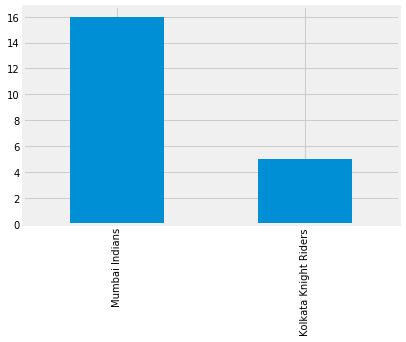

In [21]:
teamVsteam('Mumbai Indians', 'Kolkata Knight Riders')

In [22]:
# Top 10 individual scores scored by individual players...
delivery.groupby(['batsman', 'match_id']).sum()['batsman_runs'].reset_index().sort_values('batsman_runs', ascending = False).head(10)

,batsman,match_id,batsman_runs
1500,CH Gayle,411,175
1179,BB McCullum,60,158
340,AB de Villiers,562,133
355,AB de Villiers,620,129
1492,CH Gayle,372,128
4571,M Vijay,206,127
1773,DA Warner,36,126
8961,V Sehwag,516,122
6003,PC Valthaty,243,120
8915,V Sehwag,279,119


In [23]:
x = delivery[delivery['batsman'] == 'V Kohli'] # All the details of Virat Kohli...
x

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2598,12,1,Royal Challengers Bangalore,Mumbai Indians,2,2,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2604,12,1,Royal Challengers Bangalore,Mumbai Indians,3,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2605,12,1,Royal Challengers Bangalore,Mumbai Indians,3,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2606,12,1,Royal Challengers Bangalore,Mumbai Indians,3,4,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [24]:
delivery[delivery['batsman'] == 'V Kohli'].shape  # No. of balls faced by Virat Kohli...

(3494, 21)

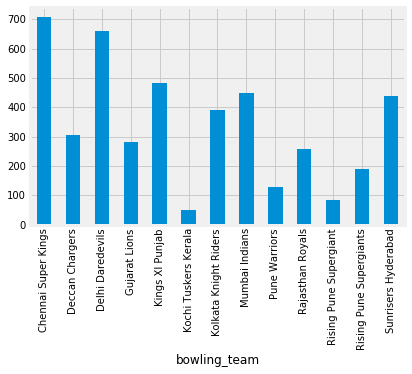

In [25]:
y = x.groupby('bowling_team').sum()['batsman_runs']  # Runs scored by Virat Kohli against each team...
y.plot(kind = 'bar')

### Function to find out total runs scored by individual player against all the teams...

In [26]:
def batsmanVteam(batsman):
    x = delivery[delivery['batsman'] == batsman]
    x.groupby('bowling_team').sum()['batsman_runs'].plot(kind = 'bar')

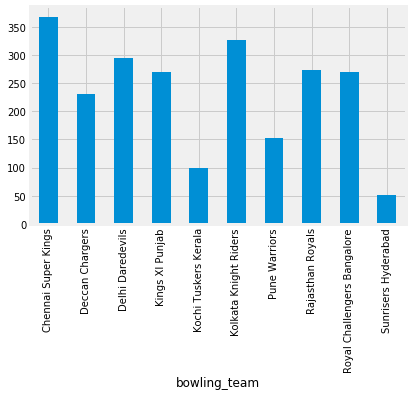

In [27]:
batsmanVteam('SR Tendulkar')

### Top 10  runs scored by an individual Batsman against individual Bowlers...

In [28]:
def batsmanVbowler(batsman):
    x = delivery[delivery['batsman'] == batsman]
    x.groupby('bowler').sum()['batsman_runs'].sort_values(ascending = False).head(10).plot(kind = 'bar')

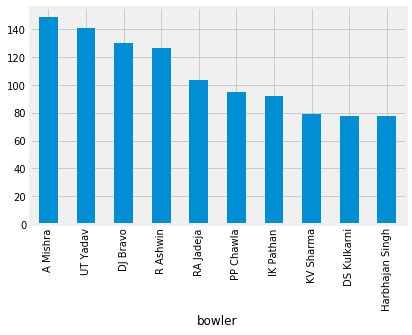

In [29]:
batsmanVbowler('V Kohli')

### Career Graph of a Batsman for every Season... 

In [30]:
x = delivery.merge(match, left_on = 'match_id', right_on = 'id')

In [31]:
new = x[x['batsman'] == 'V Kohli']

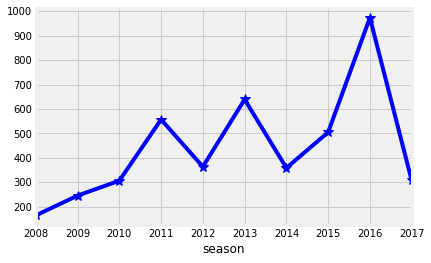

In [32]:
new.groupby('season').sum()['batsman_runs'].plot(color = 'blue', marker = '*', markersize = 10)

In [33]:
def careerGraph(batsman):
    x = delivery.merge(match, left_on = 'match_id', right_on = 'id')
    new = x[x['batsman'] == batsman]
    new.groupby('season').sum()['batsman_runs'].plot(color = 'magenta', marker = '*', markersize = 10)

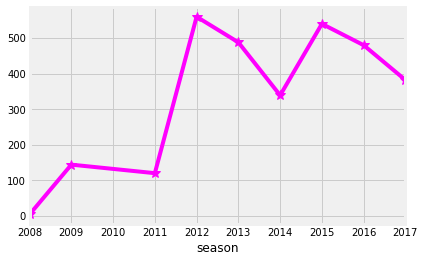

In [34]:
careerGraph('AM Rahane')

### Top bowlers with highest no. of individual wickets... 

In [35]:
delivery['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [36]:
out = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [37]:
m = delivery[delivery['dismissal_kind'].isin(out)]

In [38]:
# Top 5 bowlers with highest number of wickets overall...
m.groupby('bowler').count()['player_dismissed'].sort_values(ascending = False).head(10)

bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
Name: player_dismissed, dtype: int64

### Individual performance of bowlers innings wise... 

In [39]:
n = m[m['bowler'] == 'SL Malinga']

In [40]:
n.shape

(154, 21)

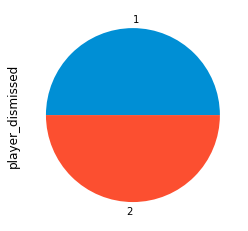

In [41]:
n.groupby('inning').count()['player_dismissed'].plot(kind = 'pie')

In [42]:
def bowlerInningsPerformance(bowler):
    n = m[m['bowler'] == bowler]
    n.groupby('inning').count()['player_dismissed'].plot(kind = 'pie', autopct = '%0.01f%%')

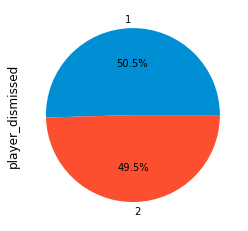

In [43]:
bowlerInningsPerformance('B Kumar')

### To plot runs scored by top 10 individual batsman against top 10 bowlers...

In [65]:
p = m.groupby('bowler').count()['player_dismissed'].sort_values(ascending = False).head(10).index.tolist()

In [66]:
p

['SL Malinga',
 'A Mishra',
 'Harbhajan Singh',
 'PP Chawla',
 'DJ Bravo',
 'B Kumar',
 'A Nehra',
 'R Vinay Kumar',
 'Z Khan',
 'R Ashwin']

In [69]:
q = delivery.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(10).index.tolist()

In [71]:
q

['SK Raina',
 'V Kohli',
 'RG Sharma',
 'G Gambhir',
 'DA Warner',
 'RV Uthappa',
 'CH Gayle',
 'S Dhawan',
 'MS Dhoni',
 'AB de Villiers']

In [73]:
batsman = delivery[delivery['batsman'].isin(q)]

In [74]:
bowler = batsman[batsman['bowler'].isin(p)]

In [77]:
x = bowler.pivot_table(columns = 'batsman', index = 'bowler', values = 'batsman_runs', aggfunc = 'sum')

In [78]:
x

batsman,AB de Villiers,CH Gayle,DA Warner,G Gambhir,MS Dhoni,RG Sharma,RV Uthappa,S Dhawan,SK Raina,V Kohli
bowler,,,,,,,,,,
A Mishra,9.0,45.0,37.0,54.0,24.0,78.0,84.0,16.0,83.0,149.0
A Nehra,61.0,45.0,25.0,27.0,76.0,62.0,55.0,42.0,15.0,60.0
B Kumar,48.0,104.0,2.0,84.0,81.0,31.0,65.0,14.0,62.0,53.0
DJ Bravo,69.0,53.0,44.0,32.0,55.0,66.0,32.0,48.0,55.0,130.0
Harbhajan Singh,80.0,78.0,97.0,84.0,47.0,8.0,75.0,103.0,132.0,78.0
PP Chawla,43.0,103.0,72.0,53.0,72.0,136.0,41.0,46.0,152.0,95.0
R Ashwin,42.0,49.0,48.0,43.0,NaN,70.0,72.0,51.0,12.0,127.0
R Vinay Kumar,16.0,0.0,5.0,62.0,33.0,22.0,65.0,24.0,98.0,26.0
SL Malinga,76.0,47.0,74.0,39.0,75.0,4.0,66.0,75.0,69.0,25.0


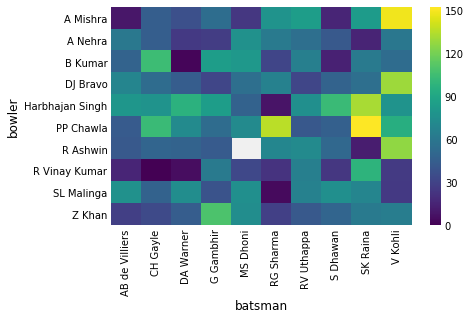

In [80]:
sns.heatmap(x, cmap = 'viridis')

### Orange Cap Holder (maximum runs scored) in each season of the IPL... 

In [81]:
x = delivery.merge(match, left_on = 'match_id', right_on = 'id')

In [85]:
new = x.groupby(['season', 'batsman']).sum()['batsman_runs']

In [97]:
new1 = new.reset_index().sort_values('batsman_runs').drop_duplicates('season', keep = 'last').sort_values('season')

In [98]:
new1

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


### Players with highest Strike rate in 15 - 20 overs having played more than 200 bowls... 

In [108]:
death_overs = delivery[delivery['over'] > 15]

In [109]:
death_overs.shape

(33737, 21)

In [110]:
a = death_overs.groupby('batsman').count()['batsman_runs']

In [111]:
b = a > 200

In [112]:
c = a[b]

In [113]:
len(c)

43

In [114]:
d = c.index.tolist()

In [115]:
death = death_overs[death_overs['batsman'].isin(d)]

In [116]:
death.shape

(16669, 21)

In [117]:
runs = death.groupby('batsman').sum()['batsman_runs']

In [118]:
bowls = death.groupby('batsman').count()['batsman_runs']

In [119]:
strike_rate = (runs / bowls) * 100

In [120]:
strike_rate.sort_values(ascending = False)

batsman
AB de Villiers      211.052632
DA Warner           189.473684
DA Miller           186.666667
V Kohli             181.868132
RG Sharma           175.668449
DJ Hussey           175.213675
RV Uthappa          173.454545
Yuvraj Singh        171.124031
JH Kallis           170.562771
MS Dhoni            169.607843
SPD Smith           169.303797
JP Duminy           167.760618
DJ Bravo            167.726161
SK Raina            167.467249
AT Rayudu           165.411765
WP Saha             163.389831
KA Pollard          161.336516
YK Pathan           159.246575
S Dhawan            158.847737
BJ Hodge            157.402597
AM Rahane           152.985075
LRPL Taylor         152.941176
KD Karthik          152.051836
DPMD Jayawardene    152.032520
MK Pandey           151.785714
JA Morkel           149.882353
JP Faulkner         149.319728
S Badrinath         149.116608
Y Venugopal Rao     148.846154
Harbhajan Singh     147.607656
AD Mathews          147.058824
KM Jadhav           144.378698


### To plot wickets taken by top 10 individual bowlers against top 10 batsman... 

In [162]:
out = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [163]:
m = delivery[delivery['dismissal_kind'].isin(out)]

In [164]:
p = m.groupby('bowler').count()['player_dismissed'].sort_values(ascending = False).head(10).index.tolist()

In [165]:
q = delivery.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(10).index.tolist()

In [166]:
batsman = delivery[delivery['batsman'].isin(q)]

In [167]:
bowler = batsman[batsman['bowler'].isin(p)]

In [170]:
x = bowler.pivot_table(columns = 'bowler', index = 'batsman', values = 'player_dismissed', aggfunc = 'count')

In [182]:
x

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Purple Cap Holder (bowlers with highest number of wickets) in each season of IPL... 

In [174]:
out = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [175]:
x = delivery.merge(match, left_on = 'match_id', right_on = 'id')

In [176]:
legal = x[x['dismissal_kind'].isin(out)]

In [178]:
wickets = legal.groupby(['season', 'bowler']).count()['player_dismissed']

In [180]:
purple_cap = wickets.reset_index().sort_values('player_dismissed').drop_duplicates('season', keep = 'last').sort_values('season')

In [181]:
purple_cap

,season,bowler,player_dismissed
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
367,2011,SL Malinga,28
437,2012,M Morkel,25
509,2013,DJ Bravo,32
639,2014,MM Sharma,23
695,2015,DJ Bravo,26
774,2016,B Kumar,23
861,2017,B Kumar,26


### Players with lowest economy rate in 15 - 20 overs having bowled more than 200 bowls...¶

In [184]:
death_overs = delivery[delivery['over'] > 15]

In [185]:
a = death_overs.groupby('bowler').count()['batsman_runs']

In [186]:
b = a > 200

In [200]:
c = a[b]

In [201]:
d = c.index.tolist()

In [202]:
death = death_overs[death_overs['bowler'].isin(d)]

In [203]:
runs = death.groupby('bowler').sum()['batsman_runs']

In [204]:
bowls = death.groupby('bowler').count()['batsman_runs']

In [205]:
economy_rate = (runs / bowls) * 6

In [206]:
economy_rate.sort_values()

bowler
SL Malinga          6.777143
SP Narine           6.876506
DE Bollinger        7.041322
R Ashwin            7.044855
MA Starc            7.057143
DW Steyn            7.317308
M Muralitharan      7.584507
WD Parnell          7.682243
Harbhajan Singh     7.744186
B Lee               7.884146
B Kumar             7.938462
DS Kulkarni         7.963636
MJ McClenaghan      8.018018
CH Morris           8.031496
KK Cooper           8.058394
DP Nannes           8.091743
PP Chawla           8.208589
R Bhatia            8.288136
DJ Bravo            8.291525
RA Jadeja           8.318182
A Nehra             8.329670
AR Patel            8.362832
RP Singh            8.449640
SR Watson           8.454992
SK Warne            8.475336
SK Trivedi          8.476190
M Morkel            8.656716
JA Morkel           8.680473
IK Pathan           8.697030
Z Khan              8.700000
MG Johnson          8.703297
Imran Tahir         8.758929
PP Ojha             8.767677
RJ Harris           8.775801
A Mishr

### Individual performance of batsman innings wise... 

In [211]:
def batsmanInningsPerformance(batsman):
    new = delivery[delivery['batsman'] == batsman]
    delivery.groupby('inning').sum()['batsman_runs'].plot(kind = 'pie', autopct = '%0.01f%%')

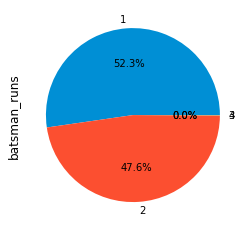

In [212]:
batsmanInningsPerformance('V Kohli')

### Career Graph of a Bowler for every Season... 

In [216]:
out = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [219]:
def careerGraphBowler(bowler):
    mer = delivery.merge(match, left_on = 'match_id', right_on = 'id')
    legal = mer[mer['dismissal_kind'].isin(out)]
    new = legal[legal['bowler'] == bowler]
    new.groupby('season').count()['player_dismissed'].plot(color = 'magenta', marker = '*', markersize = 10)

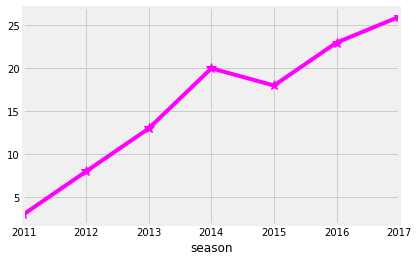

In [222]:
careerGraphBowler('B Kumar')